# Análise de dados do Titanic
Este projeto consiste em analisar dados sobre passageiros do Titanic disponíveis [no site do Kaggle](https://www.kaggle.com/c/titanic/data) para conclusão do curso Fundamentos de Data Science I do Udacity. Existe liberdade para seleção de perguntas a serem feitas sobre os dados. Todos os processos de análise dos dados serão demonstrados.
### Etapas da análise
A análise será realizada em várias etapas:
- Etapa 1: Elaboração de perguntas a serem respondidas sobre os dados

Para cada uma das perguntas definidas, a análise seguirá em outras 3 etapas:
- Etapa 2: Limpeza dos dados  
- Etapa 3: Análise dos dados em si para resposta das perguntas  
- Etapa 4: Tomada de conclusões  

### Bibliotecas utilizadas
A análise será feita com o uso da linguagem Python (versão 3.6.4) e as seguintes bibliotecas:
- Pandas (leitura dos dados CSV como DataFrames) - versão 0.22.0;
- Numpy (manipulação de vetores (*arrays*) ) - versão 1.14.0
- Matplotlib (criação de gráficos) - versão 2.1.2
- Seaborn (estilização de gráficos) - versão 0.8.1

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
% matplotlib inline
import seaborn as sns

### Índice
1. [**Etapa 1: Elaboração de perguntas**](#1)  
2. [**Pergunta 1: Passageiros de que faixa etária foram os que mais morreram?**](#2)  
 2.1. [Etapa 2: Limpeza dos dados](#2.1)  
 2.2. [Etapa 3: Análise dos dados em si para resposta à Pergunta 1](#2.2)  
 2.3. [Etapa 4: Tomada de conclusões](#2.3)  
3. [**Pergunta 2: Qual foi o sexo mais presente no Titanic?**](#3)  
 3.1. [Etapa 2: Limpeza dos dados](#3.1)  
 3.2. [Etapa 3: Análise dos dados em si para resposta à Pergunta 2](#3.2)  
 3.3. [Etapa 4: Tomada de conclusões](#3.3)  
4. [**Pergunta 3: Qual foi a média de preço do ticket?**](#4)  
 4.1. [Etapa 2: Limpeza dos dados](#4.1)  
 4.2. [Etapa 3: Análise dos dados em si para resposta à Pergunta 3](#4.2)  
 4.3. [Etapa 4: Tomada de conclusões](#4.3)  
5. [**Pergunta 4: Como foi a distribuição de pessoas entre as classes do Titanic?**](#5)  
 5.1. [Etapa 2: Limpeza dos dados](#5.1)  
 5.2. [Etapa 3: Análise dos dados em si para resposta à Pergunta 4](#5.2)  
 5.3. [Etapa 4: Tomada de conclusões](#5.3)  

## Etapa 1: Elaboração de perguntas <a name="1"></a>
Precisamos analisar pelo menos uma variável dependente e três variáveis independentes. 

In [2]:
# Lendo e conferindo os dados disponíveis
df = pd.read_csv('titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Como variáveis dependentes, identificamos: a classe do ticket (`pclass`), que depende do preço do ticket, a idade do passageiro, etc.; e a sobrevivência (`survived`), que depende, provavelmente, do sexo do passageiro, de sua idade e da classe do seu ticket.
As variáveis restantes são independentes: são, basicamente, fatos sobre cada passageiro.

Para análise de uma variável dependente, propomos a seguinte pergunta:
> **Pergunta 1: Passageiros de que faixa etária foram os que mais morreram?**

Para análise de três variáveis independentes, propomos as seguintes perguntas:
> **Pergunta 2: Qual foi o sexo mais presente no Titanic?**  
> **Pergunta 3: Qual foi a média de preço do ticket?**  
> **Pergunta 4: Como foi a distribuição de pessoas entre as classes do Titanic?**

## Pergunta 1: Passageiros de que faixa etária foram os que mais morreram? <a name="2"></a>
### Etapa 2: Limpeza dos dados <a name="2.1"></a>
Os dados necessários são:
- Número de passageiros que não sobreviveram, representado pela quantidade de entradas = 0 na coluna `Survived`;
- Faixas de idade, representado pela coluna `Age`.

In [3]:
# Renomeando colunas para facilitar a referência
df.rename(columns=lambda x: x.lower(), inplace=True)
df.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# Verificando se há nomes duplicados (e, consequentemente, linhas duplicadas)
if df['name'].duplicated().sum() == 0:
    print('Não há nomes duplicados.')
else:
    print('Há nomes duplicados!')

Não há nomes duplicados.


In [5]:
# Verificando a existência de valores vazios
df.isnull().any()

passengerid    False
survived       False
pclass         False
name           False
sex            False
age             True
sibsp          False
parch          False
ticket         False
fare           False
cabin           True
embarked        True
dtype: bool

Não há valores vazios em `survived`, mas há valores vazios em `age`. Os valores vazios em `age` podem enviesar a resposta à pergunta 1. É melhor eliminar as linhas com valores vazios. Não podemos preenchê-las com outro valor (como a média das idades, por exemplo) porque isso poderia fazer com que uma das faixas etárias tivesse muito mais mortes do que as outras.

In [6]:
# Verificando se o que está vazio é apenas a coluna em questão
## Primeiro, vamos obter índices de alguma linha que tem valores vazios em 'age'
null_in_age = [i for i, v in df['age'].iteritems() if pd.isnull(v)][:5]
null_in_age

[5, 17, 19, 26, 28]

In [7]:
## Depois, vamos verificar se as outras colunas dessas linhas estão preenchidas
df.iloc[null_in_age]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


Como é apenas a coluna age que tem valores vazios, não podemos apagar as linhas com valores vazios no DataFrame original. Vamos copiar os dados úteis para a pergunta em um outro DataFrame e, nele, apagar linhas com valores vazios:

In [8]:
print('Estamos eliminando {} linhas de um total de {} linhas.'.format(df['age'].isnull().sum(), df.shape[0]))
df_pergunta1 = df.iloc[:, [1, 5]].dropna()
df_pergunta1.head(6)

Estamos eliminando 177 linhas de um total de 891 linhas.


,survived,age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
6,0,54.0


In [9]:
## Os índices das linhas retiradas foram "pulados" (deveríamos ver o índice 5). Precisamos renumerar as linhas.
df_pergunta1.reset_index(drop=True, inplace=True)
df_pergunta1.head(6)

,survived,age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,54.0


Temos, agora, um DataFrame com 2 informações sobre cada passageiro: se ele sobreviveu ou não; sua idade. Esses são os dados necessários para nossa análise.  
Precisamos, agora, apenas verificar se os tipos dos dados que temos facilitam a sua manipulação. A análise de `age` é mais fácil se os dados forem float ou int - idades são representadas em valores numéricos.

In [10]:
# Verificando tipos dos dados
df_pergunta1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
survived    714 non-null int64
age         714 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.2 KB


Ótimo, os valores são numéricos (são float). Mas eles estão bem preenchidos? Vamos verificar que tipos de idades são encontradas:

In [11]:
# Verificando os valores dos dados
df_pergunta1['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Há alguns valores inesperados, como 0.67 e 32.5. Idades costumam ser retratadas em anos completos!  
De acordo com a documentação:
> age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

As idades de menores de 1 ano enviesam as nossas conclusões porque não permitem uma comparação direta entre menores de 1 ano e maiores de 1 ano: ao passo que nossos valores só serão relevantes para os maiores de 1 ano em faixas de 1 em 1 ano, os valores para os menores de 1 ano não estão agregados dessa mesma maneira.
As idades listadas como "xx.5" são, na verdade, "xx", o que também pode enviesar os nossos dados. As entradas de "xx.5" deveriam estar em "xx".
Desse modo, precisamos:
- Alterar a coluna `age` para os menores de 1 ano e deixá-la igual a "1";
- Alterar a coluna `age` para quem tem idade = "xx.5" e deixá-la igual a "xx".

Para a segunda alteração podemos criar dois DataFrames: um que contém tanto idades estimadas, quanto não estimadas; e um outro que contém apenas as idades sobre as quais temos certeza.

In [12]:
# Igualando valores menores que 1 a 1
df_pergunta1.loc[df_pergunta1['age'] < 1] = 1
# Verificando se deu certo
df_pergunta1.query('age < 1') # Terá dado certo se nenhum valor < 1 restar no DataFrame.

,survived,age


In [13]:
# Copiando o DataFrame em outros dois
df_pergunta1_estimado = df_pergunta1.copy()
df_pergunta1_exato = df_pergunta1.copy()

In [14]:
# No DataFrame apenas com idades exatas, precisamos remover valores no estilo "xx.5"
## Convertendo valores de age em strings
df_pergunta1_exato.age = df_pergunta1_exato.age.astype('str')
## Eliminando linhas com valores de age que terminam em ".5"
df_pergunta1_exato.drop(df_pergunta1_exato[df_pergunta1_exato.age.str[-2:] == '.5'].index, inplace = True)
## Convertendo os valores de age em int
df_pergunta1_exato.age = df_pergunta1_exato.age.astype('float')
df_pergunta1_exato.age = df_pergunta1_exato.age.astype('int')
## Renumerando as linhas
df_pergunta1_exato.reset_index(drop=True, inplace=True)
df_pergunta1_exato.head()

,survived,age
0,0,22
1,1,38
2,1,26
3,1,35
4,0,35


In [15]:
# No DataFrame com idades estimadas, precisamos igualar valores no estilo "xx.5" a "xx"
df_pergunta1_estimado['age'].apply(lambda x: int(x))
# Verificando
df_pergunta1_estimado['age'].dtype

dtype('float64')

Agora temos DataFrames com valores numéricos e preenchidos com valores de idade relevantes. Um deles contém apenas idades exatas e o outro contém também diades estimadas. Durante a análise dos dados a seguir, veremos se é realmente útil analisar os DataFrames separadamente.

### Etapa 3: Análise dos dados em si para resposta à Pergunta 1 <a name="2.2"></a>

Criando gráficos que exibam as idades das pessoas que morreram (`survived` = 0, de acordo com a documentação):

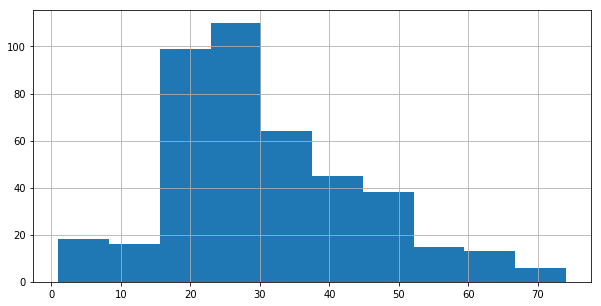

In [16]:
# Gráfico com os dados estimados
df_pergunta1_estimado.query('survived == 0')['age'].hist(figsize = (10, 5));

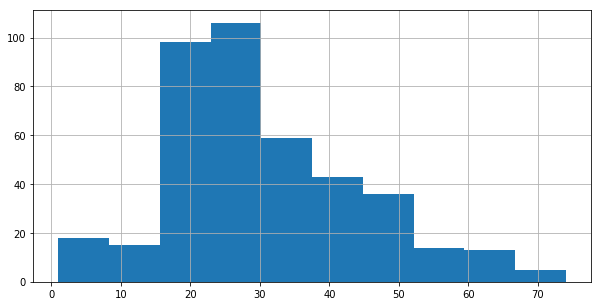

In [17]:
# Gráfico apenas com os dados exatos
df_pergunta1_exato.query('survived == 0')['age'].hist(figsize = (10, 5));

Esses gráficos contam o número de mortes de pessoas que tinham certa idade em anos, mas a pergunta fazia referência a uma faixa etária. Podemos agrupar os dados em faixas de 10 anos, desde 0 ano até 80 anos, considerando os dados que temos.

In [18]:
# Cortando as colunas age em faixas de 10 em 10 anos até 80 anos
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80]
bin_names = ['0-10 anos', '10-20 anos', '20-30 anos', '30-40 anos', '40-50 anos', '50-60 anos', '60-70 anos', '70-80 anos']
df_pergunta1_estimado['faixa_etaria'] = pd.cut(df_pergunta1_estimado['age'], bin_edges, labels=bin_names)
df_pergunta1_exato['faixa_etaria'] = pd.cut(df_pergunta1_exato['age'], bin_edges, labels=bin_names)
# Verificando algum dos DataFrames
df_pergunta1_estimado.head()

,survived,age,faixa_etaria
0,0,22.0,20-30 anos
1,1,38.0,30-40 anos
2,1,26.0,20-30 anos
3,1,35.0,30-40 anos
4,0,35.0,30-40 anos


Esses DataFrames indicam se cada pessoa sobreviveu, sua idade e em qual faixa etária essa idade se encontra. No entanto, a pergunta quer saber sobre mortes em cada faixa etária. Para isso, precisamos contar quantas mortes ocorreram em cada faixa:

In [19]:
# Obtendo os números de mortes em cada faixa etária
df_faixas_etarias_estimadas = df_pergunta1_estimado.query('survived == 0')['faixa_etaria'].value_counts().sort_index()
print('Mortes em cada faixa etária, contando idades estimadas:\n', df_faixas_etarias_estimadas)
df_faixas_etarias_exatas = df_pergunta1_exato.query('survived == 0')['faixa_etaria'].value_counts().sort_index()
print('\nMortes em cada faixa etária, contando apenas as idades conhecidas:\n', df_faixas_etarias_exatas)

Mortes em cada faixa etária, contando idades estimadas:
 0-10 anos      26
10-20 anos     71
20-30 anos    146
30-40 anos     86
40-50 anos     53
50-60 anos     25
60-70 anos     13
70-80 anos      4
Name: faixa_etaria, dtype: int64

Mortes em cada faixa etária, contando apenas as idades conhecidas:
 0-10 anos      26
10-20 anos     70
20-30 anos    141
30-40 anos     81
40-50 anos     49
50-60 anos     24
60-70 anos     13
70-80 anos      3
Name: faixa_etaria, dtype: int64


Percebe-se, inicialmente, que a diferença entre os dados estimados e os dados exatos não é relevante. Vamos verificar a diferença total no número de ocorrêncais:

In [20]:
len(df_pergunta1_estimado) - len(df_pergunta1_exato)

18

A diferença é pequena e não afeta as diferenças de ocorrências entre as faixas etárias. Se ordenamos ambas tabelas por número de mortes, a ordem de faixas etárias continua a mesma:

In [21]:
print('Mortes em cada faixa etária, contando idades estimadas:')
print(df_faixas_etarias_estimadas.sort_values(ascending=False))
print('\nMortes em cada faixa etária, contando apenas as idades conhecidas:')
print(df_faixas_etarias_exatas.sort_values(ascending=False))

Mortes em cada faixa etária, contando idades estimadas:
20-30 anos    146
30-40 anos     86
10-20 anos     71
40-50 anos     53
0-10 anos      26
50-60 anos     25
60-70 anos     13
70-80 anos      4
Name: faixa_etaria, dtype: int64

Mortes em cada faixa etária, contando apenas as idades conhecidas:
20-30 anos    141
30-40 anos     81
10-20 anos     70
40-50 anos     49
0-10 anos      26
50-60 anos     24
60-70 anos     13
70-80 anos      3
Name: faixa_etaria, dtype: int64


Portanto, para resposta à pergunta, podemos passar a usar apenas um dos DataFrames, sem que isso afete significativamente a resposta dada. Usaremos, daqui em diante, apenas os dados de `df_faixas_etarias_estimadas`.

Percebe-se que a faixa etária com mais mortes é a de pessoas entre 20 e 30 anos. Podemos apresentar isso em um gráfico:

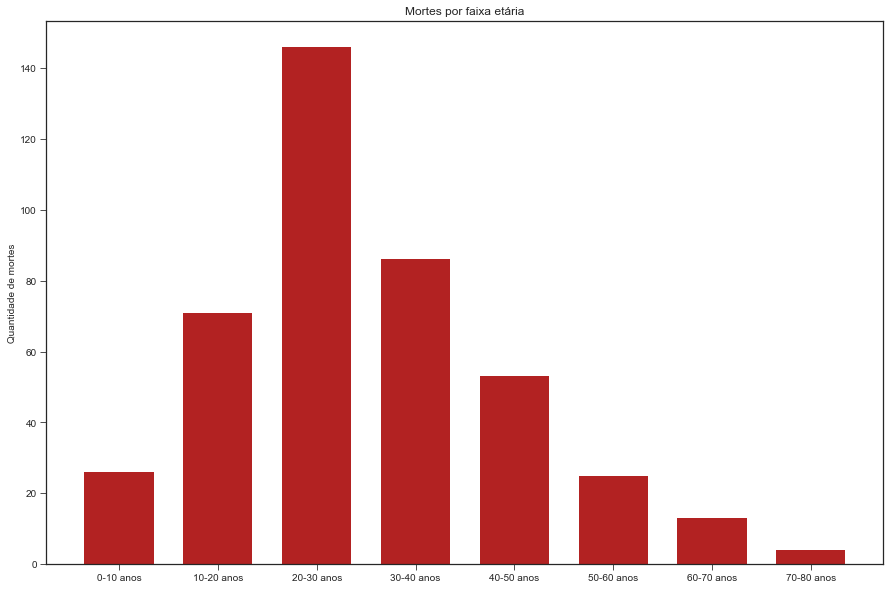

In [22]:
# Desenhando o gráfico de mortes por faixa etária

## Dados do gráfico
eixo_y_mortes = df_faixas_etarias_estimadas.values
eixo_x1 = np.arange(len(df_faixas_etarias_estimadas))

## Desenho do gráfico
sns.set_style('ticks')
mpl.pyplot.figure(figsize=(15, 10))
width = 0.7
mpl.pyplot.xticks(eixo_x1, df_faixas_etarias_estimadas.index.values.tolist())
mpl.pyplot.ylabel('Quantidade de mortes')
mpl.pyplot.title('Mortes por faixa etária')

## Chamando o gráfico
mpl.pyplot.bar(eixo_x1, eixo_y_mortes, width, color='firebrick')
mpl.pyplot.show()

As conclusões tomadas podem estar sob um viés de seleção: talvez haja mais mortes para a faixa etária de 20 a 30 anos porque é essa a faixa etária que tinha mais passageiros no Titanic. Seria útil, portanto, analisar dados proporcionais: quantos % de cada faixa etária morreu?

In [23]:
# Agrupando o DataFrame com base nas colunas survived e faixa_etaria
grouped_df1 = df_pergunta1_estimado.groupby(['faixa_etaria', 'survived']).size().unstack(fill_value=0)

# Adicionando nova coluna ao DataFrame agrupado que contém o total de pessoas de cada faixa etária
grouped_df1['total'] = grouped_df1[0] + grouped_df1[1]

# Adicionando nova coluna com valores proporcionais
grouped_df1['0/total (%)'] = ((grouped_df1[0] / grouped_df1['total'])*100).round(2)
grouped_df1['1/total (%)'] = ((grouped_df1[1] / grouped_df1['total'])*100).round(2)
grouped_df1

survived,0,1,total,0/total (%),1/total (%)
faixa_etaria,,,,,
0-10 anos,26,38,64,40.62,59.38
10-20 anos,71,44,115,61.74,38.26
20-30 anos,146,84,230,63.48,36.52
30-40 anos,86,69,155,55.48,44.52
40-50 anos,53,33,86,61.63,38.37
50-60 anos,25,17,42,59.52,40.48
60-70 anos,13,4,17,76.47,23.53
70-80 anos,4,1,5,80.00,20.00


Como se vê, a faixa etária com mais mortes em termos proporcionais foi aquela de pessoas entre 70 e 80 anos. Já a faixa etária com menos mortes em termos proporcionais foi aquela de pessoas entre 0 e 10 anos.  
Podemos apresentar todas as conclusões em um gráfico com o número absoluto de pessoas que morreram e sobreviveram em cada faixa etária, além das proporções desse número perante o número total de passageiros de cada faixa etária;

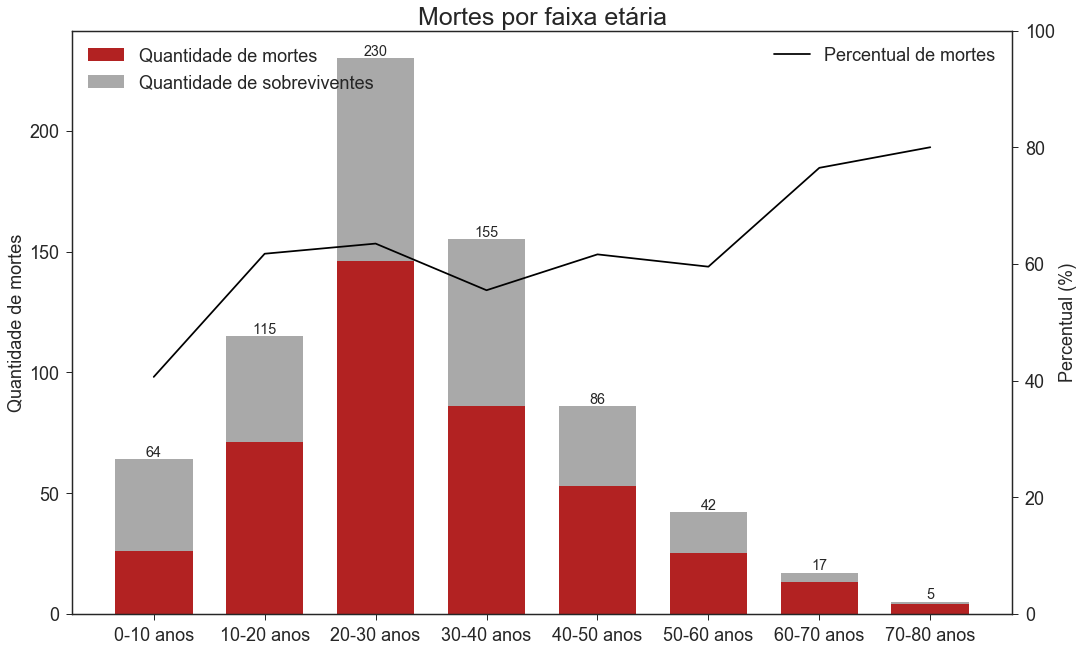

In [101]:
# Dados dos gráficos
fig, ax1 = mpl.pyplot.subplots(figsize=(15, 10))
eixo_x1 = np.arange(len(grouped_df1))
eixo_y_mortes = grouped_df1[0].values
eixo_y_sobreviventes = grouped_df1[1].values
eixo_y_proporcao_mortes = grouped_df1['0/total (%)'].values

# Estilo dos gráficos
sns.set(style='ticks')
mpl.pyplot.ylabel('Quantidade de mortes', fontsize=18)
mpl.pyplot.title('Mortes por faixa etária', fontsize=25)
ax1.tick_params(labelsize=18)

# Chamando os gráficos de barras
grafico2= ax1.bar(eixo_x1, eixo_y_mortes, 0.7, color='firebrick', tick_label=grouped_df1.index.values.tolist(), label='Quantidade de mortes');
grafico1 = ax1.bar(eixo_x1, eixo_y_sobreviventes, 0.7, color='darkgray', bottom=eixo_y_mortes, label='Quantidade de sobreviventes')
mpl.pyplot.legend(prop={'size': 18}, loc = 2);

# Adicionando as alturas das barras acima delas
for r1,r2 in zip(grafico2, grafico1):
    h1 = r1.get_height()
    h2 = r2.get_height()
    mpl.pyplot.text(r1.get_x()+r1.get_width()/2., h1+h2, '%s'% (h1+h2), ha = 'center', va='bottom', size='large')
        
# Gráfico de linha
ax2 = ax1.twinx()
ax2.plot(eixo_x1, eixo_y_proporcao_mortes, 'k-', label='Percentual de mortes')
ax2.set_ylim(0, 100)
ax2.set_ylabel('Percentual (%)')
ax2.tick_params(labelsize=18)
ax2.yaxis.label.set_size(18)
mpl.pyplot.legend(prop={'size': 18}, loc = 1);

O gráfico mostra que, no caso dos extremos (pessoas até 10 anos e maiores de 50 anos), quanto mais velho era o passageiro, mais provável foi a sua morte. Isso pode indicar uma veracidade da ordem tradicional de "crianças e mulheres primeiro" em naufrágios.  
No entanto, entre os 10 e os 50 anos, as proporções de morte em cada faixa etária são muito próximas. Houve mais mortes, inclusive, de pessoas entre 20 e 30 anso do que de pessoas entre 30 e 40 anos, o que indica que, fora crianças e idosos, não houve uma preferência na preservação da vida dos mais jovens.

### Etapa 4: Tomada de conclusões <a name="2.3"></a>
A partir dos dados acima, conclui-se que:
- A faixa etária com maior número de mortes em valores absolutos foi aquela de 20 a 30 anos, com 146 mortes;
- A faixa etária com maior número de mortes em valores relativos (ou seja, com controle pelo número de pessoas dessa faixa etária que estavam no navio) foi aquela de 70 a 80 anos, com morte de 80% dos passageiros;
- A faixa etária com menor número de mortes em valores absolutos foi também aquela de 70 a 80 anos, com 4 mortes;
- A faixa etária com menor número de mortes em valores relativos foi aquela de 0 a 10 anos, com morte de 40,62% dos passageiros.

A resposta a esta pergunta pode apresentar valores ligeiramente diferentes das respostas às perguntas seguintes, devido à não contagem de passageiros cuja idade não foi identificada (177 passageiros do total de 891).

## Pergunta 2: Qual foi o sexo mais presente no Titanic? <a name="3"></a>
### Etapa 2: Limpeza dos dados <a name="3.1"></a>
Os dados necessários são:
- Número de passageiros de cada sexo, representado pela coluna `sex`.

Para a pergunta 1, já foi verificado se há linhas duplicadas no DataFrame (não há) e em que colunas há valores vazios (não há valores vazios em `sex`). Precisamos apenas conferir os tipos de dados da coluna `sex`.

In [25]:
# Verificando o tipo de dados da coluna 'sex'
df.sex.unique()

array(['male', 'female'], dtype=object)

Os tipos de dados são esperados: strings que indicam o sexo do passageiro. Podemos apenas traduzir os sexos para ser mais fácil criar gráficos em português:

In [26]:
# Traduzindo os valores
df['sex'] = df['sex'].apply(lambda x: 'masculino' if x == 'male' else 'feminino')
# Verificando
df.sex.unique()

array(['masculino', 'feminino'], dtype=object)

Cada um dos passageiros tem um sexo assinalado. Isso já nos permite visualizar os dados facilmente.

### Etapa 3: Análise dos dados em si para resposta à Pergunta 2 <a name="3.2"></a>
Criando um DataFrame com os dados (quantidade de passageiros por sexo):

In [27]:
sex_data = pd.DataFrame(df.sex.value_counts())
sex_data

,sex
masculino,577
feminino,314


Esse DataFrame indica quantos passageiros havia no Titanic do sexo masculino e do sexo feminino. Seria útil também saber a proporção de cada sexo perante o total:

In [49]:
# Adicionando valores proporcionais
sex_data['sex_proportion (%)'] = ((sex_data/sex_data.sum())*100).round(2)
sex_data

,sex,sex_proportion (%)
masculino,577,64.76
feminino,314,35.24


Como se vê, o Titanic tinha mais passageiros do sexo masculino do que do sexo feminino. Quanto a mais?

In [59]:
print('No Titanic, o nº de passageiros do sexo masculino era {} vezes o número de passageiros do sexo feminino'.format(
    (sex_data['sex_proportion (%)'].loc['masculino'] / sex_data['sex_proportion (%)'].loc['feminino']).round(2)))

No Titanic, o nº de passageiros do sexo masculino era 1.84 vezes o número de passageiros do sexo feminino


Para representar uma resposta à pergunta 2, pordemos criar um gráfico que exiba os números de passageiros de cada sexo ("*male*" ou "*female*"), além das proporções respectivas:

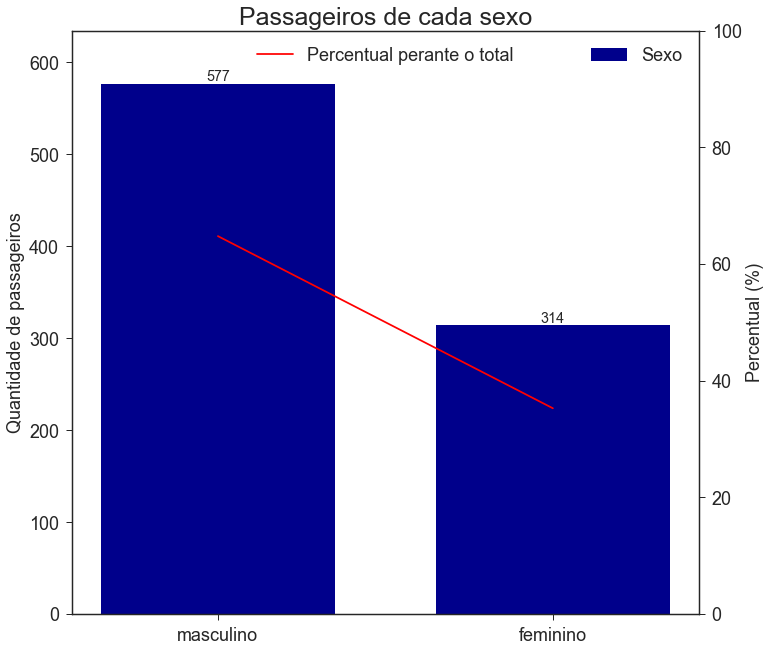

In [116]:
# Dados do gráfico
fig, ax3 = mpl.pyplot.subplots(figsize=(10, 10))
eixo_x2 = np.arange(len(sex_data['sex'].value_counts()))
eixo_y2 = sex_data['sex'].values
eixo_y_proporcao_sexo = sex_data['sex_proportion (%)'].values

# Estilo dos gráficos
sns.set(style='ticks')
mpl.pyplot.ylabel('Quantidade de passageiros', fontsize=18)
mpl.pyplot.title('Passageiros de cada sexo', fontsize=25)
ax3.tick_params(labelsize=18)
        
# Chamando o gráfico de barras
grafico3 = ax3.bar(eixo_x2, eixo_y2, 0.7, color='darkblue', tick_label=sex_data.index.values.tolist(), label='Sexo');
mpl.pyplot.legend(prop={'size': 18}, loc = 0);
mpl.pyplot.margins(y=0.1)

# Adicionando as alturas das barras acima delas
for i in grafico3:
    height = i.get_height()
    mpl.pyplot.text(i.get_x()+i.get_width()/2., height, '%s'% (height), ha = 'center', va='bottom', size='large')

# Gráfico de linha
ax4 = ax3.twinx()
ax4.plot(eixo_x2, eixo_y_proporcao_sexo, 'r-', label='Percentual perante o total')
ax4.set_ylim(0, 100)
ax4.set_ylabel('Percentual (%)')
ax4.tick_params(labelsize=18)
ax4.yaxis.label.set_size(18)
mpl.pyplot.legend(prop={'size': 18}, loc = 9);

É fácil ver, nesse gráfico, que o Titanic tinha quase o dobro de passageiros do sexo masculino em comparação com passageiros do sexo feminino: a barra "masculino" tem quase o dobro de altura da barra "feminino".  
Podemos, ainda, exibir as mesmas informações em um gráfico de pizza, que exibe as proporções de uma maneira diferente:

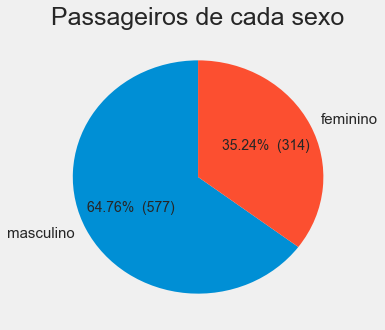

In [47]:
fig, ax9 = mpl.pyplot.subplots(figsize=(5, 5))

# Configurando variável necessária para o gráfico (etiquetas da pizza)
def make_autopct(values):
    """Cria função para criação de legendas com valores absolutos e proporcionais para um gráfico de pizza.
    Argumento:
        values: valores numéricos que estão sendo usados para o gráfico de pizza.
    Retorna: função a ser usada para o argumento "autopct" da função matplotlib.pyplot.pie(). O argumento resultará em uma string no modelo "{valor percentual}% (valor absoluto)". 
    """
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Chamando o gráfico
patches, texts, autotexts = mpl.pyplot.pie(eixo_y2, labels=sex_data.index.values.tolist(),
    autopct=make_autopct(eixo_y2),
    shadow=False, startangle=90);

# Estilo do gráfico
mpl.pyplot.title('Passageiros de cada sexo', fontsize=25) # Título do gráfico
mpl.style.use('fivethirtyeight') # O Searborn não suporta gráficos de pizza, então usamos este modelo padrão do Matplotlib.
texts = [ _.set_fontsize(15) for _ in texts ] # Aumenta as etiquetas da pizza

### Etapa 4: Tomada de conclusões <a name="3.3"></a>
A partir dos dados acima, conclui-se que:
- O sexo mais presente em valores absolutos foi o sexo masculino, com 577 passageiros (64,76% dos passageiros).

## Pergunta 3: Qual foi a média de preço do ticket? <a name="4"></a>
### Etapa 2: Limpeza dos dados <a name="4.1"></a>
Os dados necessários são:
- Médias dos preços dos tickets, dados na coluna `fare`.

Para a pergunta 1, já foi verificado se há linhas duplicadas no DataFrame e onde há valores vazios (não há valores vazios em `fare`). Precisamos apenas conferir os valores da coluna `fare`.

In [31]:
# Verificando estatísticas sobre os preços dos tickets
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Os tipos de dados permitem sua manipulação: os dados são float, um tipo numérico, como preços devem ser. Mas as estatísticas descritivas dos preços chamam a atenção:
- Os dados contêm registro de tickets vendidos de graça, o que pode ser um erro;
- O valor máximo também tem um preço muito, muito superior ao valor médio;
- Existe variedade muito grande de preços entre os diferentes quartis.

Vamos conferir visualmente os valores exatos dos tickets:

In [32]:
ordered_fares = sorted(df.fare.unique().tolist()) # Ordena uma lista com os valores dos tickets
np.r_[ordered_fares[:6], ordered_fares[-5:]] # Exibe os 5 primeiros e os 5 últimos valores da lista

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
       227.525 , 247.5208, 262.375 , 263.    , 512.3292])

Realmente existem preços muito diferentes: há passagens gratuitas, a 5, a 227, a 512... Também é estranha a existência de várias casas decimais.  
De acordo com o fórum de discussão do link da documentação, conseguimos algumas informações sobre os tickets:
- [Gareth Jones](https://www.kaggle.com/c/titanic/discussion/33087): é possível que os preços variem em razão do quão cedo ou tarde o ticket foi comprado em relação à data da viagem;
- [Nick Yee](https://www.kaggle.com/c/titanic/discussion/33087#183182): os preços não são por pessoa: os tickets eram vendidos para uma família como um todo, de modo que os valores em `fare` são o preço dos tickets da família dividido pelo número de pessoas da família; há preços reduzidos diferentes para menores de 12 anos e de 1 ano; alguns tickets da terceira classe tinham passagem de trem incluída no preço; alguns tickets (principalmente da terceira classe) mudavam de preço a depender do país de compra;
- [Daniel Burrueco](https://www.kaggle.com/c/titanic/discussion/37630#210625): As casas decimais decorrem da adoção de um sistema não centesimal pela Grã-Bretanha à época.

As diferenças nos preços são um problema. Uma média de preços de todos passageiros do navio tem sua utilidade reduzida, considerando tantas coisas que influenciam no preço do ticket que nos são desconhecidas (data da compra; detalhes sobre a precificação para crianças e adolescentes, que [é relatada de maneiras diferentes](https://www.encyclopedia-titanica.org/community/threads/children-on-the-titanic.20096/#post-254451); preços das passagens de trens dos tickets de terceira classe; informações sobre o país de compra de cada ticket). Apenas a questão da venda dos tickets para uma família não é um problema, afinal, realmente estamos buscando o preço médio por pessoa (informação que temos), e não por família.  
Por outro lado, as casas decimais não são um problema: são apenas uma atualização de valores.

Em conclusão: como não conseguimos controlar as diferentes variáveis na composição do preço do ticket, devemos deixar claro, na resposta à pergunta, que a média do preço é afetada por variáveis desconhecidas, tais como detalhes sobre a precificação do ticket para crianças/adolescentes, a inclusão de passagem de trem no preço do ticket e a origem do passageiro.  
Resta saber como lidar com as passagens gratuitas. A diferença de preços entre as passagens não é um erro, mas, talvez, as passagens gratuitas sejam. As passagens gratuitas foram dos seguintes passageiros:

In [33]:
df.query('fare == 0')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
179,180,0,3,"Leonard, Mr. Lionel",masculino,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",masculino,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",masculino,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",masculino,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",masculino,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",masculino,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",masculino,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",masculino,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",masculino,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",masculino,NaN,0,0,112052,0.0,NaN,S


Há relatos sobre alguns dos passageiros indicados nesse DataFrame:
- William Harrison era secretário pessoal de chefe da empresa responsável pelo Titanic [(link)](https://www.encyclopedia-titanica.org/titanic-victim/william-harrison.html);
- Jonkheer Johan George Reuchlin era também integrante do grupo de empresas responsável pelo navio [(link)](https://www.encyclopedia-titanica.org/titanic-victim/johan-george-reuchlin.html);
- Outros sete dos passageiros listados foram enviados pela empresa que construiu o navio para acompanhá-lo em sua viagem inaugural [(link)](https://www.encyclopedia-titanica.org/titanic-guarantee-group/).

Como se vê, há razões para a existência de tickets gratuitos, de modo que pode não ser razoável a eliminação desses dados.

Já temos dados relevantes para o cálculo da média e podemos seguir para a próxima etapa da análise.

### Etapa 3: Análise dos dados em si para resposta à Pergunta 2 <a name="4.2"></a>

In [167]:
# Calculando a média do preço das passagens
fare_mean = df.fare.describe()['mean']
fare_mean.round(2)

32.2

32,2 é a média de preço das passagens. Mas 32,2 o quê? No fórum da documentação, há [referência](https://www.kaggle.com/c/titanic/discussion/37630#210625) para o [*site* Statistical Consultants Ltd.](http://www.statisticalconsultants.co.nz/blog/titanic-fare-data.html), que diz que os preços são em libras esterlinas de 1912. Com dados de índices inflacionários da publicação[ "Inflation: the value of the pound 1750-1998"](http://researchbriefings.parliament.uk/ResearchBriefing/Summary/RP99-20) e da base de dados [World Economic Outlook, do FMI](https://www.imf.org/external/pubs/ft/weo/2018/01/weodata/index.aspx), a Statistical Consultants Ltd. estimou que o nível de preços gerais em 2012 seriam 82,11378 vezes os preços de 1912. Podemos também fazer essa atualização sobre a média das passagens do Titanic:

In [134]:
a = (fare_mean*82.11378).round(2)
print(f'Em valores de 2012, a média de preço das passagens do Titanic era de £{a}')

Em valores de 2012, a média de preço das passagens do Titanic era de £2644.41


Seria interessante ver como as médias de preços diferem em cada classe. Vamos fazer essa comparação.

In [186]:
grouped_fare_data = df.groupby('pclass').mean()['fare']
print('Em valores de 1912, as médias eram:\n', grouped_fare_data)
print('\nEm valores de 2012, as médias eram:\n', grouped_fare_data*82.11378)

# Calculando a diferença entre a 2ª e a 3ª classe
d = (df.groupby('pclass').mean()['fare']['2ª Classe'] - df.groupby('pclass').mean()['fare']['3ª Classe'])/df.groupby('pclass').mean()['fare']['3ª Classe']
print(f'\nA 2ª Classe custava, em média, {d.round(2)} vezes mais que a 1ª classe!')

# Calculando a diferença entre a 3ª e a 1ª classe
d = (df.groupby('pclass').mean()['fare']['1ª Classe'] - df.groupby('pclass').mean()['fare']['3ª Classe'])/df.groupby('pclass').mean()['fare']['3ª Classe']
print(f'A 1ª Classe custava, em média, {d.round(2)} vezes mais que a 3ª classe!')

Em valores de 1912, as médias eram:
 pclass
1ª Classe    84.154687
2ª Classe    20.662183
3ª Classe    13.675550
Name: fare, dtype: float64

Em valores de 2012, as médias eram:
 pclass
1ª Classe    6910.259495
2ª Classe    1696.649962
3ª Classe    1122.951112
Name: fare, dtype: float64

A 2ª Classe custava, em média, 0.51 vezes mais que a 1ª classe!
A 1ª Classe custava, em média, 5.15 vezes mais que a 3ª classe!


Como pudemos ver, havia uma diferença relativamente pequena entre os tickets da 1ª e a 2ª Classe, mas uma diferença relativamente muito grande entre os tickets da 1ª e da 3ª classe!

Por último, mesmo que não tenha sido necessária a retirada dos tickets gratuitos da nossa amostra, é possível dizer que eles são apenas uma parte pequena dos dados. Podemos calcular o impacto da inclusão deles ou não na média de preços:

In [142]:
# Considerando que estamos falando de passagens gratuitas, a soma do preço das passagens é a mesma,
# sejam as passagens gratuitas contabilizadas ou não. No cálculo da média, a única diferença é
# a quantidade total de passagens vendidas. Podemos fazer uma função para a diferença da média com
# passagens gratuitas e sem passagens gratuitas.
def diferenca_media(media_com_gratuidades, quantidade_total, quantidade_de_gratuidades):
    """Calcula a diferença entre uma média de preços pagos se não forem contabilizadas gratuidades e a média se forem
    contabilizadas gratuidades.
    Argumentos:
        media_sem_gratuidades: média de preços pagos se as gratuidades forem contabilizadas;
        quantidade_total: quantidade total de ocorrências (pagamentos) contabilizados no cálculo da média, incluídas 
        as gratuidades.
        quantidade_de_gratuidades: quantidade de pagamentos gratuidos existentes.
    Retorna: float com a diferença entre as médias
    """
    soma_ocorrencias = media_com_gratuidades * quantidade_total
    media_sem_gratuidades = soma_ocorrencias / (quantidade_total-quantidade_de_gratuidades)
    return media_sem_gratuidades - media_com_gratuidades

# Verificando no nosso caso
fare_mean_difference = diferenca_media(fare_mean, df.fare.describe()['count'], len(df.query('fare == 0')))
print(f'Em valores de 1912, a diferença na média é de £{fare_mean_difference.round(2)}')
print(f'Em valores de 2012, a diferença na média é de £{(fare_mean_difference*82.11378).round(2)}')

Em valores de 1912, a diferença na média é de £0.55
Em valores de 2012, a diferença na média é de £45.28


A diferença na média parece pequena em valores de 1912, mas não muito em valores de 2012. Mas e em termos proporcionais?

In [36]:
print('A média sem gratuidades é {}% maior do que a média com gratuidades.'.format(
    ((fare_mean_difference / fare_mean)*100).round(2)))

A média sem gratuidades é 1.71% maior do que a média com gratuidades.


Podemos concluir, assim, que: há razões para os tickets gratuitos terem sido incluídos entre os dados; mesmo que os tickets gratuitos fosse retirados dos dados, o impacto proporcional disso não seria relevante.

Para ilustrar uma resposta à pergunta 3, podemos fazer um diagrama de extremos e quartis que demonstre a variação dos preços dos tickets. Vale destacar que a linha laranja nos gráficos exibe a mediana, e não a média:

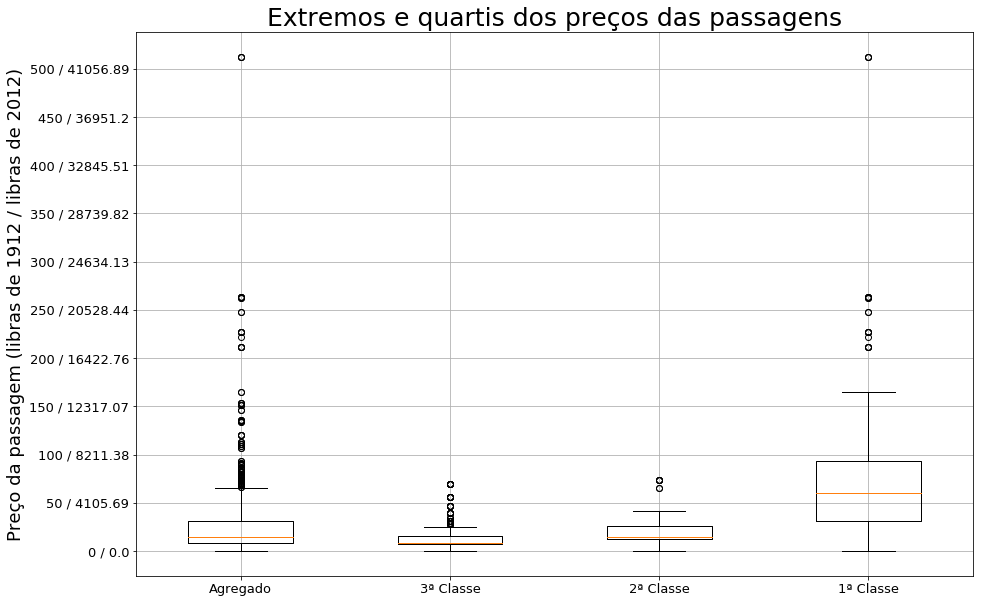

In [311]:
# Dados do gráfico
fig, ax5 = mpl.pyplot.subplots(figsize=(15, 10))
fare_data = df.fare.tolist()
fare_data_1 = df.query("pclass == '1ª Classe'")['fare'].tolist()
fare_data_2 = df.query("pclass == '2ª Classe'")['fare'].tolist()
fare_data_3 = df.query("pclass == '3ª Classe'")['fare'].tolist()
total_fare_data = [fare_data, fare_data_3, fare_data_2, fare_data_1]
labels = ['Agregado', '3ª Classe', '2ª Classe', '1ª Classe']

# Estilo dos gráficos
sns.reset_orig() # Precisamos desativar o Seaborn porque ele oculta os 'fliers' que indicam os valores 'outliers' no gráfico.
mpl.pyplot.ylabel('Preço da passagem (libras de 1912 / libras de 2012)', fontsize=18)
mpl.pyplot.title('Extremos e quartis dos preços das passagens', fontsize=25)
ax5.tick_params(labelsize=13)
ax5.grid() # O gráfico fica melhor de ser lido se usarmos uma grade
ax5.set_yticks([i for i in range(0, 501, 50)]) # A grade fica melhor se usarmos valores de 50 em 50

# Chamando o gráfico
ax5.boxplot(total_fare_data, widths=0.5);
ax5.set_xticklabels(labels);

# Editando as etiquetas do eixo y
l = ax5.get_yticks().tolist();
l = [str(i) + ' / {}'.format(np.float64(i*82.11378).round(2)) for i in l];
ax5.set_yticklabels(l);

Vemos, no gráfico acima, que a variação de preços de tickets de 1ª Classe foi muito maior do que a variação de tickets de 3ª Classe, embora as estatísticas da 3ª Classe exibam um número maior de valores discrepantes (*outliers*: tickets com preço maior que 1,5 vezes o intervalo interquartílico, ou seja, preço maior que 1,5 vezes a diferença entre o 3º e o 1º quartil de preços). Ademais, na 1ª Classe, observa-se uma quantidade maior de tickets de valor superior ao do terceiro quartil.  
O gráfico também confirma nossa observação sobre a variação de preços ser muito maior da 3ª para a 1ª classe (ou mesmo da 2ª para a 1ª) do que da 3ª para a 2ª classe.

Uma outra alternativa de exibição dos resultados é fazer um gráfico de violino, que demonstra tanto os extremos e quartis, quanto a distribuição de preços de tickets (isso com o uso de [*Estimativa de densidade kernel*](https://en.wikipedia.org/wiki/Kernel_density_estimation)):

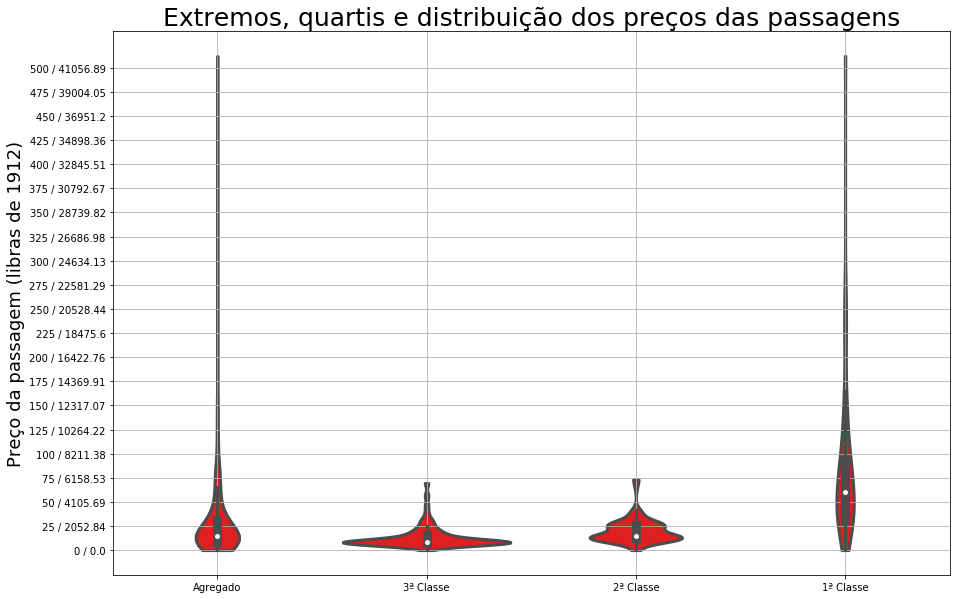

In [312]:
fig, ax6 = mpl.pyplot.subplots(figsize=(15, 10));
sns.violinplot(data=total_fare_data, linewidth=3, color='r', cut=0); # Gráfico violino
mpl.pyplot.ylabel('Preço da passagem (libras de 1912)', fontsize=18) # Nome do eixo y
ax6.set_xticklabels(labels); # Labels do eixo x
mpl.pyplot.title('Extremos, quartis e distribuição dos preços das passagens', fontsize=25) # Título do gráfico
ax6.grid(); # O gráfico fica melhor de ser lido se usarmos uma grade
ax6.set_yticks([i for i in range(0, 501, 25)]); # Os dados são melhor lidos se usarmos valores de 25 em 25

# Editando as etiquetas do eixo y
l = ax6.get_yticks().tolist();
l = [str(i) + ' / {}'.format(np.float64(i*82.11378).round(2)) for i in l];
ax6.set_yticklabels(l);

O gráfico demonstra uma quantidade muito grande de tickets comprados na 3ª classe, todos concentrados em uma mesma faixa de preços. A concentração de tickets da 2ª classe em uma faixa de preço é maior do que a concentração de tickets da 1ª classe em uma mesma faixa: uma quantidade semelhante de tickets da 1ª classe foi comprada por diferentes preços.  
A largura do gráfico para a 3ª classe indica que essa foi a classe com o maior número de passageiros. Mas como se comparam a 2ª e a 1ª classe? Veremos isso de forma exata na próxima pergunta.

### Etapa 4: Tomada de conclusões <a name="4.3"></a>
A partir dos dados acima, conclui-se que:
- A média de preços geral (em todas classes) é de £32,20. Esse é o preço em 1912: em valores mais recentes, de 2012, o preço médio é de £2644,41.
- Por classe, as médias de preços são (em valores de 1912 e de 2012, respectivamente):
 - 3ª classe £13,67 / £1122,95
 - 2ª classe £20,66 / £1696,65
 - 1ª classe £84,15 / £6910,26

Essas médias de preços incluem passageiros que pagaram preços muito diferentes não só em razão da classe no navio (primeira, segunda ou terceira classe), mas também em razão de:
 - Data da compra em relação à data da viagem;
 - Precificação diferente para crianças e adolescentes;
 - Inclusão do preço de passagem de trem no ticket do Titanic;
 - Diferenciação do preço de acordo com o país de compra.

## Pergunta 4: Como foi a distribuição de pessoas entre as classes do Titanic? <a name="5"></a>
### Etapa 2: Limpeza dos dados <a name="5.1"></a>
Os dados necessários são:
- Número de passageiros em cada clase, representado pela quantidade de entradas = 1, 2 e 3 na coluna `pclass`.

Para a pergunta 1, já foi verificado se há linhas duplicadas no DataFrame e se há valores vazios em `pclass` (não há). Precisamos apenas conferir os tipos de dados da coluna `pclass`.

In [39]:
# Verificando o tipo de dados da coluna 'pclass'
df.pclass.unique()

array([3, 1, 2], dtype=int64)

De acordo com a documentação, 3 = 3ª Classe, 2 = 2ª Classe e 1 = 1ª Classe. Vamos "traduzir" os valores:

In [40]:
# Renomeando os valores
df['pclass'] = df['pclass'].apply(lambda x: '3ª Classe' if x == 3 else ('2ª Classe' if x == 2 else '1ª Classe'))
# Verificando
df.pclass.unique()

array(['3ª Classe', '1ª Classe', '2ª Classe'], dtype=object)

### Etapa 3: Análise dos dados em si para resposta à Pergunta 4 <a name="5.2"></a>
Agrupando os dados em um DataFrame:

In [41]:
df4 = df.groupby('pclass').size().to_frame()
df4.rename(columns={0: "Quantity"}, inplace=True)
df4

,Quantity
pclass,
1ª Classe,216
2ª Classe,184
3ª Classe,491


Adicionando valores proporcionais:

In [42]:
df4['class_proportion (%)'] = ((df4/df4.sum())*100).round(2)
df4

,Quantity,class_proportion (%)
pclass,,
1ª Classe,216,24.24
2ª Classe,184,20.65
3ª Classe,491,55.11


Para finalmente responder à pergunta, pordemos criar um gráfico que exiba os números de passageiros em cada classe, além das proporções respectivas:

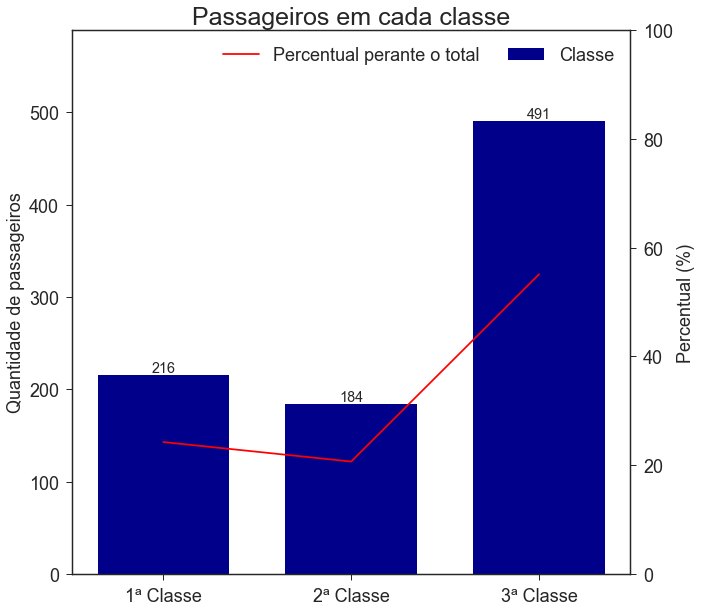

In [124]:
# Dados do gráfico
fig, ax7 = mpl.pyplot.subplots(figsize=(10, 10))
eixo_x7 = np.arange(len(df4['Quantity'].value_counts()))
eixo_y7 = df4['Quantity'].values
eixo_y_proporcao_classe = df4['class_proportion (%)'].values

# Estilo dos gráficos
sns.set(style='ticks')
mpl.pyplot.ylabel('Quantidade de passageiros', fontsize=18)
mpl.pyplot.title('Passageiros em cada classe', fontsize=25)
ax7.tick_params(labelsize=18)

# Chamando o gráfico de barras
grafico4 = ax7.bar(eixo_x7, eixo_y7, 0.7, color='darkblue', tick_label=df4.index.values.tolist(), label='Classe');
mpl.pyplot.legend(prop={'size': 18}, loc = 0);
mpl.pyplot.margins(y=0.2)

# Adicionando as alturas das barras acima delas
for i in grafico4:
    height = i.get_height()
    mpl.pyplot.text(i.get_x()+i.get_width()/2., height, '%s'% (height), ha = 'center', va='bottom', size='large')

# Gráfico de linha
ax8 = ax7.twinx()
ax8.plot(eixo_x7, eixo_y_proporcao_classe, 'r-', label='Percentual perante o total')
ax8.set_ylim(0, 100)
ax8.set_ylabel('Percentual (%)')
ax8.tick_params(labelsize=18)
ax8.yaxis.label.set_size(18)
mpl.pyplot.legend(prop={'size': 18}, loc = 9);

Podemos, ainda, exibir as mesmas informações em um gráfico de pizza, que facilita a visualização das proporções:

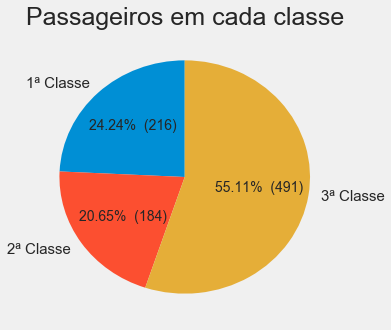

In [46]:
fig, ax10 = mpl.pyplot.subplots(figsize=(5, 5))

# Chamando o gráfico
patches, texts, autotexts = mpl.pyplot.pie(eixo_y7, labels=df4.index.values.tolist(),
    autopct=make_autopct(eixo_y7),
    shadow=False, startangle=90);

# Estilo do gráfico
mpl.pyplot.title('Passageiros em cada classe', fontsize=25) # Título do gráfico
mpl.style.use('fivethirtyeight') # O Searborn não suporta gráficos de pizza, então usamos este modelo padrão do Matplotlib.
texts = [ _.set_fontsize(15) for _ in texts ] # Aumenta as etiquetas da pizza

### Etapa 4: Tomada de conclusões <a name="5.3"></a>
A partir dos dados acima, conclui-se que:
- Em valores absolutos, as classes com mais passageiros foram, da mais cheia para a mais vazia:
 - 3ª (491 passageiros);
 - 1ª (216 passageiros);
 - 2ª (184 passageiros).
- Já em termos proporcionais, as classes tiveram o seguinte percentual do total de passageiros:
 - 3ª: 55,11%;
 - 2ª: 20,65%;
 - 1ª: 24,24%.